2347215 ARUNOTH SYMEN A

1. Text Preprocessing:

In [27]:
import pandas as pd
df=pd.read_csv(r"D:\Project\APyP\Labs\Lab-8\MovieReview.csv",encoding="utf-8")
df.head(10)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
5,"I saw this film on September 1st, 2005 in Indi...",1
6,I saw a screening of this movie last night. I ...,0
7,William Hurt may not be an American matinee id...,1
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0


In [28]:
print(df.columns) # to get column names
print("\n")
df.info()

Index(['text', 'label'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [29]:
print(df.isna().sum())

text     0
label    0
dtype: int64


In [30]:
df.shape

(5000, 2)

In [31]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv(r"D:\Project\APyP\Labs\Lab-8\MovieReview.csv", encoding="utf-8")

df['text']=df['text'].str.lower()

# Tokenize the text column
df['tokens'] = df['text'].apply(word_tokenize)

# Remove stop words
stop_words=set(stopwords.words("english"))

filtered_texts = []
for token_list in df['tokens']:
    filtered_word = []
    for word in token_list:
        if word.casefold() not in stop_words:
            filtered_word.append(word)
    filtered_texts.append(filtered_word)

df['filtered_list'] = filtered_texts

# the tokens are in list format so we use two lists
print("Before filtering:", df['tokens'].apply(len).sum())
print("After filtering:", df['filtered_list'].apply(len).sum())
df.tail(5)

Before filtering: 1401060
After filtering: 848997


,text,label,tokens,filtered_list
4995,this is the kind of picture john lassiter woul...,1,"[this, is, the, kind, of, picture, john, lassi...","[kind, picture, john, lassiter, would, making,..."
4996,a must see! i saw whipped at a press screening...,1,"[a, must, see, !, i, saw, whipped, at, a, pres...","[must, see, !, saw, whipped, press, screening,..."
4997,nbc should be ashamed. i wouldn't allow my chi...,0,"[nbc, should, be, ashamed, ., i, would, n't, a...","[nbc, ashamed, ., would, n't, allow, children,..."
4998,this movie is a clumsy mishmash of various gho...,0,"[this, movie, is, a, clumsy, mishmash, of, var...","[movie, clumsy, mishmash, various, ghost-story..."
4999,formula movie about the illegitimate son of a ...,0,"[formula, movie, about, the, illegitimate, son...","[formula, movie, illegitimate, son, rich, chil..."


In [32]:
# lemmatisation
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

lemmatized_Words=[] # for all rows
for filtered_word in df['filtered_list']:
    lemmatized_text=[] # for each row
    for word in filtered_word:
         # Remove punctuation or special characters
        word = ''.join(char for char in word if char.isalpha())
        lemmatized_text.append(lemmatizer.lemmatize(word))
    lemmatized_Words.append(lemmatized_text)

df['lemmatized_words']=lemmatized_Words        
df.tail(5)

,text,label,tokens,filtered_list,lemmatized_words
4995,this is the kind of picture john lassiter woul...,1,"[this, is, the, kind, of, picture, john, lassi...","[kind, picture, john, lassiter, would, making,...","[kind, picture, john, lassiter, would, making,..."
4996,a must see! i saw whipped at a press screening...,1,"[a, must, see, !, i, saw, whipped, at, a, pres...","[must, see, !, saw, whipped, press, screening,...","[must, see, , saw, whipped, press, screening, ..."
4997,nbc should be ashamed. i wouldn't allow my chi...,0,"[nbc, should, be, ashamed, ., i, would, n't, a...","[nbc, ashamed, ., would, n't, allow, children,...","[nbc, ashamed, , would, nt, allow, child, see,..."
4998,this movie is a clumsy mishmash of various gho...,0,"[this, movie, is, a, clumsy, mishmash, of, var...","[movie, clumsy, mishmash, various, ghost-story...","[movie, clumsy, mishmash, various, ghoststory,..."
4999,formula movie about the illegitimate son of a ...,0,"[formula, movie, about, the, illegitimate, son...","[formula, movie, illegitimate, son, rich, chil...","[formula, movie, illegitimate, son, rich, chil..."


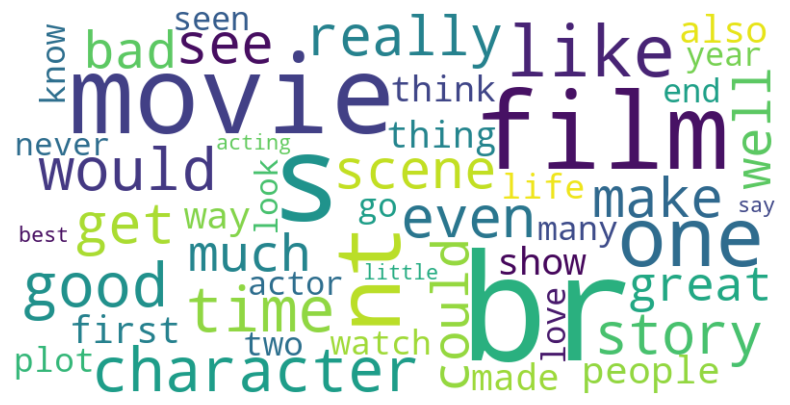

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all lemmatized words into a single list
all_words = []
for row in df['lemmatized_words']:
    all_words.extend(row)

# Calculate the frequency of each word
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Select the top 50 most common words
top_50_words = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:50])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2. Text Similarity

In [34]:
# Extract the first 20 reviews
text1_reviews = df['text'].head(20)

# Write the first 20 reviews to Text1 file
with open('Text1.txt', 'w', encoding='utf-8') as file:
    for review in text1_reviews:
        file.write(review + '\n')

# Extract the next 20 reviews
text2_reviews = df['text'].iloc[20:40]

# Write the next 20 reviews to Text2 file
with open('Text2.txt', 'w', encoding='utf-8') as file:
    for review in text2_reviews:
        file.write(review + '\n')

In [35]:
f=open("Text1.txt")
data1=f.read()

In [36]:
f=open("Text2.txt")
data2=f.read()

In [37]:
# user defined function for preprocessing
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_text(data):
    given_text=word_tokenize(data1)
    stop_words=set(stopwords.words("english"))

    filtered_list=[]
    for word in given_text:
        if word.casefold() not in stop_words:
            filtered_list.append(word)
    filter=' '.join(map(str,filtered_list))        

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filter]
    lem=' '.join(map(str,filter))  
       
    return {
        'word_tokenizer': word,
        'filtered_text': filter,
        'lemmatized_text': lem
    }  

In [38]:
# preprocessing text
tokens1=set(preprocess_text(data1))

tokens2=set(preprocess_text(data2))

# create TF-IDF vectors
vectorizer=TfidfVectorizer()
vector1=vectorizer.fit_transform(tokens1)
vector2=vectorizer.fit_transform(tokens2)
#print(vector1,"\n",vector2) 


# cosine similarity
cosine_similarity_score = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity Score: {cosine_similarity_score}")

Cosine Similarity Score: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Create TF-IDF vectors for data1
vector1 = vectorizer.fit_transform([data1])

# Create TF-IDF vectors for data2 using the same vectorizer instance
vector2 = vectorizer.transform([data2])

# Calculate cosine similarity
cosine_similarity_score = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity Score: {cosine_similarity_score}")

Cosine Similarity Score: [[0.9763542]]


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def jaccard_similarity(set1,set2):
    intersection=len(set1.intersection(set2))
    union=len(set1.union(set2))
    return intersection/union

# cal jaccard similarity
jaccard_similariy_score=jaccard_similarity(tokens1,tokens2)
print(f"jaccard similarity : {jaccard_similariy_score}")

jaccard similarity : 1.0


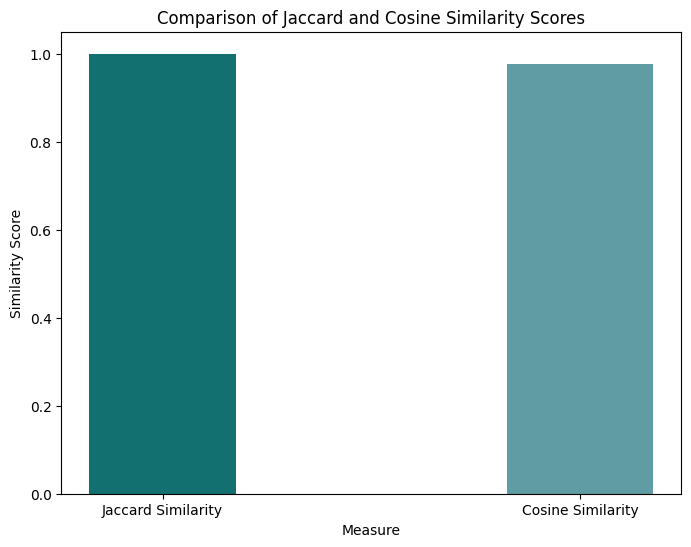

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = ['Jaccard Similarity', 'Cosine Similarity']
colors = ['#137070', '#609ca4'] 

plt.bar(index, [jaccard_similariy_score, cosine_similarity_score[0][0]], bar_width, color=colors)
plt.title('Comparison of Jaccard and Cosine Similarity Scores')
plt.xlabel('Measure')
plt.ylabel('Similarity Score')
plt.xticks(index, ['Jaccard Similarity', 'Cosine Similarity'])
plt.show()